<a href="https://colab.research.google.com/github/wsbrito/DesafiosDIO/blob/main/Desafio_Treinamento_de_Redes_Neurais_com_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de Redes Neurais com Transfer Learning
## Autor: Wagner dos Santos Brito
### Objetivo
Realizar o treinamento de uma rede neral capaz de classifica se uma imagem é de uma moto ou de uma bicicleta.

## Declaração dos imports

In [1]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from google.colab import drive
import zipfile

from PIL import Image



## Declaração das funções auxiliares

In [2]:
def count_files_in_folder(folder_path):
  """Conta a quantidade de arquivos em uma pasta específica.

  Args:
    folder_path: Caminho da psta.

  Returns:
    Quantidade de arquivos na pasta ou -1 se a pasta não existir.
  """
  if not os.path.exists(folder_path):
    print(f"Error: Folder '{folder_path}' not found.")
    return -1

  file_count = 0
  for _, _, files in os.walk(folder_path):
    file_count += len(files)
  return file_count

In [3]:
def rotate_images(image_dir, angle=90, initial_number=50):
    """Rotaciona as imagens em um diretório e as salva no mesmo diretório porém
    com o nome numérico acrescido de uma unidade.

    Args:
      image_dir: Pasta onde estão as imagens.
      angle: Ângulo de rotação.
      initial_number: Número inicial para o nome das imagens.
    """
    for filename in os.listdir(image_dir):
        initial_number+=1
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_dir, filename)
            try:
                img = Image.open(img_path)
                rotated_img = img.rotate(angle)
                _, ext = os.path.splitext(filename)
                new_filename = f"{initial_number:03d}{ext}"
                output_path = os.path.join(image_dir, new_filename)
                rotated_img.save(output_path)
                print(f"Rotated and saved: {filename} to {output_path}")
            except IOError:
                print(f"Error rotating image: {filename}")


In [9]:
# helper function to load image and return it and input vector
def get_image(path):
    """Recupera a imagem e sua versão reduzida no formato de uma array numérico.

    Args:
      path: Caminho da imagem.

    Returns:
      img - A imagem
      x - Sua versão reduzida no formato de uma array numérico.
    """
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

## Preparação das imagens

Foram recuperadas 25 imagens de biclicletas e motocicletas e num primeiro tratamento realizou-se a inversão no eixo vertical dobrando a quantidade.
Exemplo:


| ANTES    | DEPOIS |
| -------- | ------- |
| 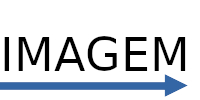  |  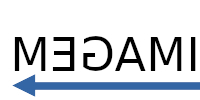   |




Efetuando a leitura do arquivo compactado

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Learning/BairesDEV/dataset.zip'  # Replace with the actual path

# Specify the directory to extract the files to
extract_dir = '/content/drive/MyDrive/Learning/BairesDEV/' # Replace with your desired directory

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
        print(f"Files extracted successfully to {extract_dir}")

    # Now you can access the extracted files
    for filename in os.listdir(extract_dir):
        file_path = os.path.join(extract_dir, filename)
        print(f"Extracted file: {filename}")

except FileNotFoundError:
    print(f"Error: Zip file not found at {zip_file_path}")
except zipfile.BadZipFile:
    print(f"Error: Invalid zip file at {zip_file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files extracted successfully to /content/drive/MyDrive/Learning/BairesDEV/
Extracted file: Desafio - Treinamento de Redes Neurais com Transfer Learning.ipynb
Extracted file: Exemplo-01-MatplotLib.ipynb
Extracted file: Exemplo-02-Deep_Learning.ipynb
Extracted file: dataset.zip
Extracted file: dataset_folder
Extracted file: Cópia de transfer-learning.ipynb
Extracted file: dataset


Conferindo os arquivos descompactdos. Esperasse 50 imagens de motos e mais 50 imgens de bicicletas

In [5]:

# Example usage (replace with your actual folder paths):
folder_path_bicycle = '/content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle'
folder_path_motorcycle = '/content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle'

bicycle_count = count_files_in_folder(folder_path_bicycle)
motorcycle_count = count_files_in_folder(folder_path_motorcycle)

if bicycle_count != -1 and motorcycle_count != -1:
    print(f"Number of bicycle images: {bicycle_count}")
    print(f"Number of motorcycle images: {motorcycle_count}")
    print(f"Total number of images: {bicycle_count + motorcycle_count}")

Number of bicycle images: 50
Number of motorcycle images: 50
Total number of images: 100


### Será utilizada a técnica de rotação para dobrar a quantidade de imagens.

| ANTES    | DEPOIS |
| -------- | ------- |
| 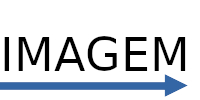  | 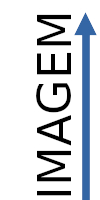  |


In [6]:
rotate_images(folder_path_bicycle, 90, bicycle_count)

Rotated and saved: 033.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/051.png
Rotated and saved: 037.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/052.png
Rotated and saved: 038.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/053.png
Rotated and saved: 039.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/054.png
Rotated and saved: 001.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/055.png
Rotated and saved: 002.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/056.png
Rotated and saved: 003.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/057.png
Rotated and saved: 004.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/058.png
Rotated and saved: 005.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/059.png
Rotated and saved: 006.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle/060.png
Rotated and saved: 007.png to /content/d

In [7]:
rotate_images(folder_path_motorcycle, 90, motorcycle_count)

Rotated and saved: 027.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/051.png
Rotated and saved: 028.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/052.png
Rotated and saved: 029.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/053.png
Rotated and saved: 030.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/054.png
Rotated and saved: 031.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/055.png
Rotated and saved: 032.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/056.png
Rotated and saved: 033.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/057.png
Rotated and saved: 034.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/058.png
Rotated and saved: 009.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/059.png
Rotated and saved: 035.png to /content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle/060.png
Rotated an

Realização de uma nova conferência na quantidade de arquivos

In [8]:
bicycle_count = count_files_in_folder(folder_path_bicycle)
motorcycle_count = count_files_in_folder(folder_path_motorcycle)

if bicycle_count != -1 and motorcycle_count != -1:
    print(f"Number of bicycle images: {bicycle_count}")
    print(f"Number of motorcycle images: {motorcycle_count}")
    print(f"Total number of images: {bicycle_count + motorcycle_count}")

Number of bicycle images: 100
Number of motorcycle images: 100
Total number of images: 200


## Preparação do dataset para treinamento

De acordo com o material de referência precisamos armezenar numa lista as imagens convertidas em array e seu label (identificação) para efetuar o treinamento do modelo

In [11]:
root = '/content/drive/MyDrive/Learning/BairesDEV/dataset'
exclude = []

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['/content/drive/MyDrive/Learning/BairesDEV/dataset/motorcycle', '/content/drive/MyDrive/Learning/BairesDEV/dataset/bicycle']


In [12]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)
print(num_classes)

Alterando a ordem das imagens na lista de forma aleatória

In [16]:
random.shuffle(data)

Dividindo a lista para treinamento, validação e teste (70%, 15%, 15%)

In [17]:
train_split, val_split = 0.7, 0.15

idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

**Separando** os dados por labels (categoria).

In [18]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0]


*Preprocessamento* das imagens assegurando-se que serão float32 e normalizadas entre 0 e 1.

In [19]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(30, 2)


Resumo do que foi feito até o momento

In [20]:
# summary
print("Carregamento de %d imagens em %d categorias"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 200 images from 2 categories
train / validation / test split: 140, 30, 30
training data shape:  (140, 224, 224, 3)
training labels shape:  (140, 2)


Visualização de algumas imagens do dataset

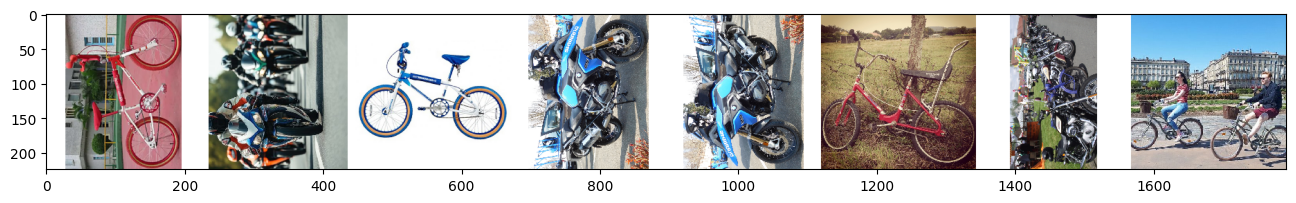

In [21]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

## Configuração da rede neural

In [22]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [24]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

## Realização do treinamento da rede neural

In [25]:
treinamento = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 106s 24s/step - accuracy: 0.5195 - loss: 0.7743 - val_accuracy: 0.5333 - val_loss: 0.9776
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 134s 25s/step - accuracy: 0.5069 - loss: 0.9384 - val_accuracy: 0.4667 - val_loss: 1.1274
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 145s 26s/step - accuracy: 0.5126 - loss: 0.9618 - val_accuracy: 0.5333 - val_loss: 0.7205
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 149s 25s/step - accuracy: 0.6027 - loss: 0.5700 - val_accuracy: 0.5333 - val_loss: 0.9078
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 133s 25s/step - accuracy: 0.5126 - loss: 0.8328 - val_accuracy: 0.5667 - val_loss: 0.7662
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 95s 25s/step - accuracy: 0.5411 - loss: 0.6567 - val_accuracy: 0.6333 - val_loss: 0.6184
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 142s 25s/step - accuracy: 0.7600 - loss: 0.4661 - val_accuracy: 0.4667 - val_loss: 0.8285
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 153s 34s/step - accuracy: 0.5221 - loss: 0.6325 - val_accuracy: 0.6667 - val_loss: 

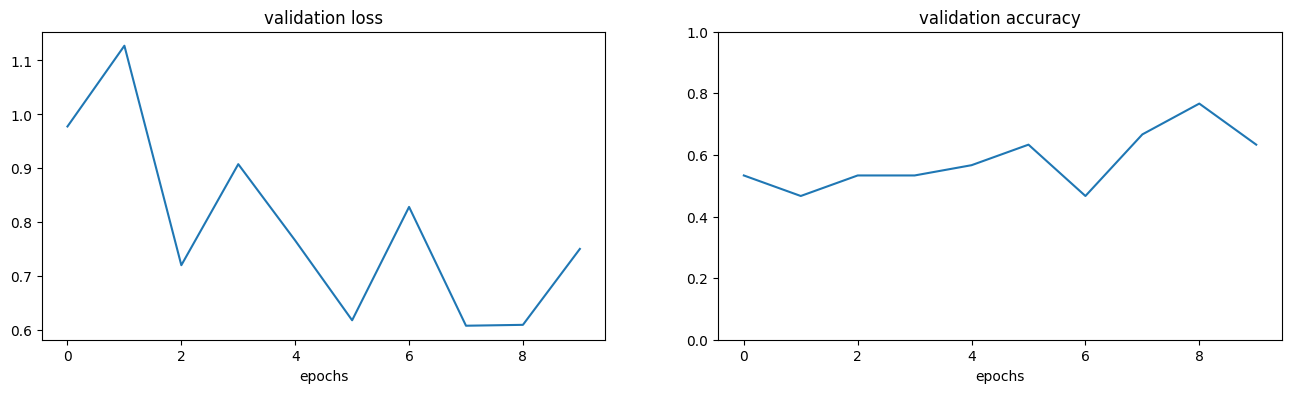

In [35]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(treinamento.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(treinamento.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [31]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.7133462429046631
Test accuracy: 0.6333333253860474


## Avaliando as predições

In [41]:
def predict_class(probabilities):
  """Predicts the class with the highest probability.

  Args:
      probabilities: A NumPy array of probabilities for each class.

  Returns:
      A string indicating the predicted class ("motorcycle" or "bicycle")
      and the corresponding probability.
  """
  predicted_class = np.argmax(probabilities)
  probability = probabilities[predicted_class]

  if predicted_class == 0:
      class_name = "Motocicleta"
  elif predicted_class == 1:
      class_name = "Bicicleta"
  else:
      class_name = "unknown"

  return f"Predicted class: {class_name} with probability: {probability:.4f}"

As imagens abaixo foram recém recuperadas da internet e incluídas no Google Drive

In [42]:
img, x = get_image('/content/drive/MyDrive/Learning/BairesDEV/dataset/moto-1-1-e1719406302282.png')
probabilities = model_new.predict([x])
print(predict_class(probabilities[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
Predicted class: Motocicleta with probability: 0.9181


In [43]:
img, x = get_image('/content/drive/MyDrive/Learning/BairesDEV/dataset/1908b04ffcda149cdd89804b690f1134-0.png')
probabilities = model_new.predict([x])
print(predict_class(probabilities[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
Predicted class: Bicicleta with probability: 0.9800


## Conclusão

O tranfer learning facilitou muito o processo de criação de treinamento de uma rede já que boa parte dos pesos foram "herdados" do treinamento anterior.
Com relação ao desenpenho da rede considero bem satisfatório com base no percentual de certeza que foi demostrado para a novas amostras.